In [15]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import optimize, stats

In [2]:
# Data arrays
y_data = np.array([
    1.500e-04, 1.500e-04, 1.500e-04, 1.500e-04, 1.700e-04, 1.600e-04, 1.800e-04,
    1.600e-04, 1.700e-04, 2.300e-04, 2.500e-04, 3.200e-04, 3.200e-04, 3.800e-04,
    4.000e-04, 5.000e-04, 5.600e-04, 5.600e-04, 6.500e-04, 7.500e-04, 9.100e-04,
    1.180e-03, 1.550e-03, 2.110e-03, 2.880e-03, 3.850e-03, 5.200e-03, 6.780e-03,
    8.950e-03, 1.123e-02, 1.403e-02, 1.723e-02, 2.031e-02, 2.330e-02, 2.495e-02,
    2.433e-02, 2.171e-02, 1.725e-02, 1.231e-02, 8.080e-03, 4.980e-03, 2.960e-03,
    1.970e-03, 1.830e-03, 2.220e-03, 2.880e-03, 3.700e-03, 4.650e-03, 5.820e-03,
    7.150e-03, 8.450e-03, 9.510e-03, 1.006e-02, 9.660e-03, 8.560e-03, 6.910e-03,
    5.100e-03, 3.380e-03, 2.170e-03, 1.230e-03, 7.000e-04, 3.600e-04, 2.200e-04,
    1.700e-04, 1.500e-04, 1.600e-04, 1.100e-04, 1.100e-04, 1.200e-04, 1.000e-04,
    1.200e-04, 1.100e-04, 1.300e-04, 1.500e-04, 1.200e-04, 1.600e-04, 1.200e-04,
    1.200e-04, 1.200e-04, 1.200e-04, 1.100e-04, 1.500e-04, 1.500e-04, 1.300e-04,
    1.100e-04, 8.000e-05, 1.200e-04, 1.200e-04, 1.100e-04, 1.100e-04, 1.500e-04])

x_data = np.array([
    6555.101, 6555.201, 6555.301, 6555.401, 6555.501, 6555.601, 6555.701, 6555.801,
    6555.901, 6556.001, 6556.101, 6556.201, 6556.301, 6556.401, 6556.501, 6556.601,
    6556.701, 6556.801, 6556.901, 6557.001, 6557.101, 6557.201, 6557.301, 6557.401,
    6557.501, 6557.601, 6557.701, 6557.801, 6557.901, 6558.001, 6558.101, 6558.201,
    6558.301, 6558.401, 6558.501, 6558.601, 6558.701, 6558.801, 6558.901, 6559.001,
    6559.101, 6559.201, 6559.301, 6559.401, 6559.501, 6559.601, 6559.701, 6559.801,
    6559.901, 6560.001, 6560.101, 6560.201, 6560.301, 6560.401, 6560.501, 6560.601,
    6560.701, 6560.801, 6560.901, 6561.001, 6561.101, 6561.201, 6561.301, 6561.401,
    6561.501, 6561.601, 6561.701, 6561.801, 6561.901, 6562.001, 6562.101, 6562.201,
    6562.301, 6562.401, 6562.501, 6562.601, 6562.701, 6562.801, 6562.901, 6563.001,
    6563.101, 6563.201, 6563.301, 6563.401, 6563.501, 6563.601, 6563.701, 6563.801,
    6563.901, 6564.001, 6564.001])

In [5]:
def peak(x, A, mu, sigma):
    law = stats.norm(loc=mu, scale=sigma)
    return A * law.pdf(x) / law.pdf(mu)

In [8]:
def model(x, A0, mu0, sigma0, A1, mu1, sigma1):
    return peak(x, A0, mu0, sigma0) + peak(x, A1, mu1, sigma1)

In [11]:
popt, pcov = optimize.curve_fit(model, x_data, y_data, p0=[0.025, 6559, 1, 0.01, 6561, 1])

In [12]:
xlin = np.linspace(x_data.min(), x_data.max(), 200)
ylin = model(xlin, *popt)

In [17]:
def pseudo_voigt(x, eta, sigma, gamma, x0, A):
    G = stats.norm.pdf(x, scale=sigma, loc=x0)
    L = stats.cauchy.pdf(x, scale=2. * gamma, loc=x0)
    return A * ((1. - eta) * G + eta * L)

In [18]:
def model2(x, eta0, sigma0, gamma0, x00, A0, eta1, sigma1, gamma1, x01, A1):
    return pseudo_voigt(x, eta0, sigma0, gamma0, x00, A0) + pseudo_voigt(x, eta1, sigma1, gamma1, x01, A1)

In [26]:
popt2, pcov2 = optimize.curve_fit(
    model2,
    x_data, y_data,
    p0=[0.5, 1., 1., 6559, 0.025, 0.5, 1., 1., 6561, 0.01],
    bounds=[
         (0, 0, 0, 0, 0, 0, 0, 0, 0, 0),
         (1, np.inf, np.inf, np.inf, np.inf, 1, np.inf, np.inf, np.inf, np.inf)
    ]
)
popt2, pcov2

(array([5.04788238e-01, 3.39173299e-01, 2.55686905e-01, 6.55847681e+03,
        2.75922544e-02, 3.34888395e-19, 3.35457589e-01, 4.01394103e+00,
        6.56029885e+03, 7.93603468e-03]),
 array([[ 8.86571451e-03,  8.35897628e-04, -5.77440596e-03,
          2.12430868e-06, -1.00305337e-06, -1.98655078e-03,
         -7.05031879e-05, -1.83679287e-20,  9.71166064e-05,
         -1.51505527e-05],
        [ 8.35897628e-04,  5.09820348e-04, -1.66751155e-03,
         -4.47397787e-06, -2.09621370e-05,  4.74020589e-03,
          6.45069395e-05, -2.49144370e-21, -6.49042040e-05,
          4.01860759e-05],
        [-5.77440596e-03, -1.66751155e-03,  7.05374077e-03,
          1.24787675e-05,  6.59252914e-05, -1.49874615e-02,
         -1.53573305e-04,  1.43064336e-20,  1.63145136e-04,
         -1.26056745e-04],
        [ 2.12430868e-06, -4.47397787e-06,  1.24787675e-05,
          2.44361381e-05,  2.73513975e-07, -5.63908866e-05,
         -3.68649042e-06,  2.30311507e-23,  2.39647899e-06,
         -5.3

In [27]:
ylin2 = model2(xlin, *popt2)

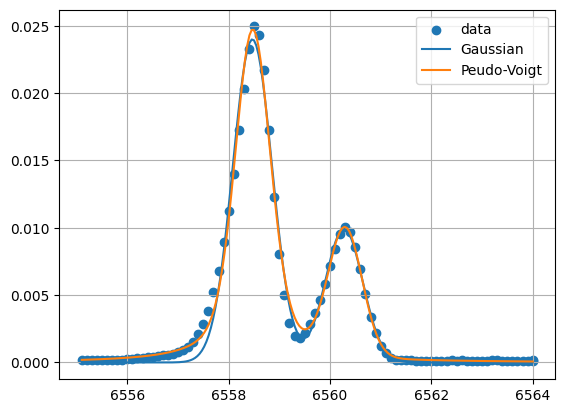

In [29]:
fig, axe = plt.subplots()
axe.scatter(x_data, y_data, label="data")
axe.plot(xlin, ylin, label="Gaussian")
axe.plot(xlin, ylin2, label="Peudo-Voigt")
axe.legend()
axe.grid()